# Sorting algorithms

### Insertion sort  
Worst-case performance: O(n^2) - when array is reversed  
Best-case performance: O(n) - when array is already sorted
_________
https://en.wikipedia.org/wiki/Insertion_sort  
https://www.toptal.com/developers/sorting-algorithms/insertion-sort  

In [11]:
def insertion_sort(array):
    # return array if it contains only one element
    if len(array) == 1:
        return array
    
    for j in range(1, len(array)):
        # store element
        key = array[j]
        
        # get index for previous element
        i = j - 1
        
        # move i element right if it's greater then j element (key)
        # repeat as long as left element exists
        while array[i] > key and i >= 0:
            array[i + 1] = array[i]
            i -= 1
            
        array[i + 1] = key
        
    return array

## Average running time vs array length

In [16]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [83]:
def time_vs_len(sorting_algorithm):    
    
    
    # define list to store time
    times = np.array([])
    lengths = np.array([])
    
    l = 2
    while l < 1000:
        # define average time
        avg_time = 0
        
        for i in range(10):
            # create array to run algorithm on
            array = np.random.randint(low=0, high=100000, size=l)

            t1 = time.time()
            sorting_algorithm(array)
            t2 = time.time()
            
            avg_time += (t2 - t1) / 10
        
        times = np.append(times, avg_time)
        lengths = np.append(lengths, l)
        
        # update l
        l += 20
            
    return (lengths, times)

In [84]:
lengths, times = time_vs_len(insertion_sort)

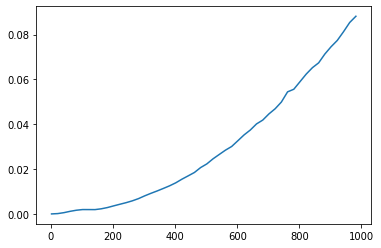

In [85]:
plt.plot(lengths, times)